In [14]:
import matplotlib.pyplot
import pandas
import numpy
import sklearn.preprocessing

In [3]:
raw = pandas.read_csv("data/wei/Guang_HRD_CL_raw_data.txt", sep="\t")

In [4]:
raw.head()

,NAME,control1,control2,control3,control4,CT10A1.A,CT10A2.A,CT10A.B,BRCA1.51,BRCA1.52,BRCA1.53,BRCA1.54,Rad51.41,Rad51.42,Rad51.43,Rad51.44,Brit.2A2,Brit.2B,Brit.2C,Brit.2D
0,AADAT,256.56,304.78,270.96,238.60,322.06,288.78,283.25,134.09,135.47,126.58,133.00,121.68,131.34,108.66,118.78,110.40,122.32,127.16,126.21
1,ADM,2132.21,2017.45,2193.94,2243.14,3454.55,3430.52,4609.12,8723.39,10725.27,10634.54,10160.55,15919.92,14790.76,14790.76,13054.66,8290.50,8061.00,7901.17,7767.69
2,AHSA1,4137.80,4730.35,3968.53,3876.03,2820.95,2788.50,2982.08,1046.21,1120.36,1053.48,989.68,1782.07,1675.19,1541.23,1672.95,1263.24,1007.35,1057.45,955.79
3,ALDH3B1,250.77,223.14,255.95,242.84,453.18,398.06,269.28,1522.11,1709.81,1707.64,1811.92,1101.49,1071.62,1153.79,1191.34,2161.01,2450.97,2480.69,2343.39
4,ALDH6A1,295.05,318.49,289.38,293.27,374.89,362.87,229.66,970.61,942.96,957.96,1129.75,1157.91,1250.20,1206.01,1074.89,1556.67,1480.00,1635.35,1717.37


In [34]:
melted = raw.melt(id_vars="NAME", var_name="sample", value_name="expr")

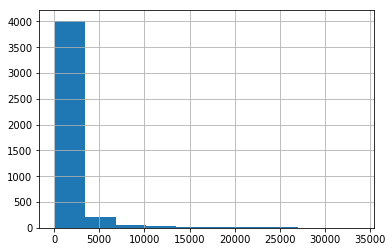

In [35]:
melted["expr"].hist()

In [99]:
infosheet = pandas.read_csv("data/wei/Guang_HRD_CL_infosheet.txt", sep="\t")
infosheet = infosheet.rename(columns={"RefName": "sample"})
infosheet

,sample,HRD_class,Set
0,control1,ctrl,3
1,control2,ctrl,3
2,control3,ctrl,3
3,control4,ctrl,3
4,CT10A1.A,ctrl,1
5,CT10A2.A,ctrl,1
6,CT10A.B,ctrl,1
7,BRCA1.51,HRD,3
8,BRCA1.52,HRD,3
9,BRCA1.53,HRD,3


In [185]:
melted["log2_expr"] = melted["expr"].apply(numpy.log2)

In [186]:
melted.head()

,NAME,sample,expr,log2_expr
0,AADAT,control1,256.56,8.003152
1,ADM,control1,2132.21,11.058134
2,AHSA1,control1,4137.80,12.014648
3,ALDH3B1,control1,250.77,7.970221
4,ALDH6A1,control1,295.05,8.204816


In [194]:
melted[melted["NAME"] == "AADAT"]

,NAME,sample,expr,log2_expr
0,AADAT,control1,256.56,8.003152
230,AADAT,control2,304.78,8.251624
460,AADAT,control3,270.96,8.081936
690,AADAT,control4,238.60,7.898450
920,AADAT,CT10A1.A,322.06,8.331186
1150,AADAT,CT10A2.A,288.78,8.173827
1380,AADAT,CT10A.B,283.25,8.145932
1610,AADAT,BRCA1.51,134.09,7.067058
1840,AADAT,BRCA1.52,135.47,7.081830
2070,AADAT,BRCA1.53,126.58,6.983906


In [187]:
expr_medians = pandas.DataFrame({"expr_median": melted.groupby("NAME")["log2_expr"].median()})
melted_b = pandas.merge(melted, expr_medians, on="NAME")

In [188]:
melted_b.head()

,NAME,sample,expr,log2_expr,expr_median
0,AADAT,control1,256.56,8.003152,7.055282
1,AADAT,control2,304.78,8.251624,7.055282
2,AADAT,control3,270.96,8.081936,7.055282
3,AADAT,control4,238.60,7.898450,7.055282
4,AADAT,CT10A1.A,322.06,8.331186,7.055282


In [189]:
melted_b["expr_medctr"] = melted_b["log2_expr"] - melted_b["expr_median"]

In [197]:
melted_b[melted_b["NAME"] == "AADAT"]

,NAME,sample,expr,log2_expr,expr_median,expr_medctr
0,AADAT,control1,256.56,8.003152,7.055282,0.947870
1,AADAT,control2,304.78,8.251624,7.055282,1.196342
2,AADAT,control3,270.96,8.081936,7.055282,1.026654
3,AADAT,control4,238.60,7.898450,7.055282,0.843168
4,AADAT,CT10A1.A,322.06,8.331186,7.055282,1.275903
5,AADAT,CT10A2.A,288.78,8.173827,7.055282,1.118545
6,AADAT,CT10A.B,283.25,8.145932,7.055282,1.090650
7,AADAT,BRCA1.51,134.09,7.067058,7.055282,0.011775
8,AADAT,BRCA1.52,135.47,7.081830,7.055282,0.026547
9,AADAT,BRCA1.53,126.58,6.983906,7.055282,-0.071377


In [199]:
sample_mean_stddev = pandas.DataFrame({
    "sample_stddev": melted_b.groupby("sample")["expr_medctr"].std(),
    "sample_mean": melted_b.groupby("sample")["expr_medctr"].mean(),
})

In [200]:
melted_d = pandas.merge(melted_b, sample_mean_stddev, on="sample")

In [201]:
melted_d.head()

,NAME,sample,expr,log2_expr,expr_median,expr_medctr,sample_stddev,sample_mean
0,AADAT,control1,256.56,8.003152,7.055282,0.947870,1.429057,0.4264
1,ADM,control1,2132.21,11.058134,12.976743,-1.918609,1.429057,0.4264
2,AHSA1,control1,4137.80,12.014648,10.708179,1.306470,1.429057,0.4264
3,ALDH3B1,control1,250.77,7.970221,10.172165,-2.201944,1.429057,0.4264
4,ALDH6A1,control1,295.05,8.204816,9.922748,-1.717932,1.429057,0.4264


In [202]:
#z = ((melted_d["expr"] - melted_d["expr_median"] - melted_d["sample_mean"]) / melted_d["sample_stddev"])
z = (melted_d["expr_medctr"] - melted_d["sample_mean"]) / melted_d["sample_stddev"]

melted_e = melted_d.copy()
melted_e["z"] = z
melted_e.head()
z_median = pandas.DataFrame({"z_median": melted_e.groupby("NAME")["z"].median()})
melted_f = pandas.merge(melted_e, z_median, on="NAME")
melted_f.head()

,NAME,sample,expr,log2_expr,expr_median,expr_medctr,sample_stddev,sample_mean,z,z_median
0,AADAT,control1,256.56,8.003152,7.055282,0.947870,1.429057,0.426400,0.364905,0.016693
1,AADAT,control2,304.78,8.251624,7.055282,1.196342,1.488643,0.448334,0.502477,0.016693
2,AADAT,control3,270.96,8.081936,7.055282,1.026654,1.405071,0.385077,0.456615,0.016693
3,AADAT,control4,238.60,7.898450,7.055282,0.843168,1.398584,0.386259,0.326694,0.016693
4,AADAT,CT10A1.A,322.06,8.331186,7.055282,1.275903,1.313724,0.307710,0.736984,0.016693


In [203]:
melted_g = melted_f.copy()
melted_g["z_std_med"] = melted_f["z"] - melted_f["z_median"]

In [204]:
melted_g[melted_g["NAME"] == "AADAT"]

,NAME,sample,expr,log2_expr,expr_median,expr_medctr,sample_stddev,sample_mean,z,z_median,z_std_med
0,AADAT,control1,256.56,8.003152,7.055282,0.947870,1.429057,0.426400,0.364905,0.016693,0.348212
1,AADAT,control2,304.78,8.251624,7.055282,1.196342,1.488643,0.448334,0.502477,0.016693,0.485784
2,AADAT,control3,270.96,8.081936,7.055282,1.026654,1.405071,0.385077,0.456615,0.016693,0.439922
3,AADAT,control4,238.60,7.898450,7.055282,0.843168,1.398584,0.386259,0.326694,0.016693,0.310001
4,AADAT,CT10A1.A,322.06,8.331186,7.055282,1.275903,1.313724,0.307710,0.736984,0.016693,0.720291
5,AADAT,CT10A2.A,288.78,8.173827,7.055282,1.118545,1.322712,0.307785,0.612952,0.016693,0.596259
6,AADAT,CT10A.B,283.25,8.145932,7.055282,1.090650,1.249463,0.277603,0.650717,0.016693,0.634024
7,AADAT,BRCA1.51,134.09,7.067058,7.055282,0.011775,0.338435,0.030430,-0.055121,0.016693,-0.071813
8,AADAT,BRCA1.52,135.47,7.081830,7.055282,0.026547,0.421485,-0.044395,0.168315,0.016693,0.151622
9,AADAT,BRCA1.53,126.58,6.983906,7.055282,-0.071377,0.386700,-0.002400,-0.178372,0.016693,-0.195065


In [205]:
melted_h = pandas.merge(melted_g, infosheet, on="sample")

In [180]:
melted_h[melted_h["HRD_class"] == "ctrl"].groupby("NAME")["z_std_med"].mean()

NAME
AADAT       -0.012118
ADM         -2.002276
AHSA1        0.546689
ALDH3B1     -0.386164
ALDH6A1     -0.320288
ALG8         0.393043
ANLN         0.921026
ARSD        -0.274516
ASF1B        0.026304
ASPM         0.462902
ATP10B      -0.132332
AURKB        0.315909
BBOX1       -0.204949
BLM          0.007523
BRCA1        0.060053
BRI3BP       0.330582
BTG1        -4.238286
BTG2        -0.204652
C10orf119   -0.012643
C10orf73    -0.121823
C11orf82     0.077960
C13orf3      0.043255
C14orf145   -0.017632
C15orf42    -0.015424
C16orf59     0.044404
C16orf68    -0.308862
C17orf41    -0.018409
C1QTNF6      0.008877
C1orf112     0.072225
C1orf54     -0.119683
               ...   
SUV39H1      0.152300
TACC3        0.156734
TAF5         0.000828
TERF1       -0.273218
TIGA1       -2.271351
TIMELESS     0.181990
TINF2       -0.446399
TK1          0.372742
TMC4        -0.177410
TMEM158      0.118016
TMEM171     -0.018147
TMEM20       0.010922
TNFRSF14    -0.176458
TRIP13       0.458379
TTK  